## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
## 在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.min()) / (x.max() - x.min()) * 2 - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               6579

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.6899 - accuracy: 0.3945 - val_loss: 1.5568 - val_accuracy: 0.4507
Epoch 2/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.4554 - accuracy: 0.4868 - val_loss: 1.4255 - val_accuracy: 0.4954
Epoch 3/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.3378 - accuracy: 0.5275 - val_loss: 1.3627 - val_accuracy: 0.5142
Epoch 4/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.2433 - accuracy: 0.5618 - val_loss: 1.4057 - val_accuracy: 0.5020
Epoch 5/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.1644 - accuracy: 0.5871 - val_loss: 1.3651 - val_accuracy: 0.5197
Epoch 6/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.0808 - accuracy: 0.6152 - val_loss: 1.3650 - val_accuracy: 0.5226
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 8s 153us/step - loss: 0.1092 - accuracy: 0.9644 - val_loss: 3.4896 - val_accuracy: 0.5293
Epoch 56/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.1050 - accuracy: 0.9653 - val_loss: 3.5550 - val_accuracy: 0.5304
Epoch 57/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.1009 - accuracy: 0.9676 - val_loss: 3.8636 - val_accuracy: 0.5307
Epoch 58/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.0959 - accuracy: 0.9681 - val_loss: 3.7603 - val_accuracy: 0.5307
Epoch 59/100
50000/50000 [==============================] - 7s 148us/step - loss: 0.0989 - accuracy: 0.9683 - val_loss: 3.5390 - val_accuracy: 0.5257
Epoch 60/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.0959 - accuracy: 0.9688 - val_loss: 3.7143 - val_accuracy: 0.5307
Epoch 61/100
50000/50000 [==============================] - 7s 150us/step - loss: 0.1020 - accuracy: 0.9660 - val

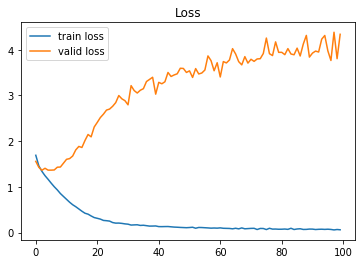

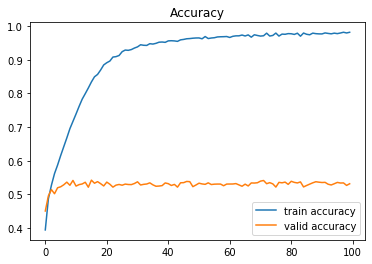

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()